Created on Wed Nov 27 14:51 2019

This script plots Figure 9, based on results from 'experiment_meltpondfraction0.ipynb' and 'mpf0_prepare_files.sh'

Path to output of the experiment
   * SICCI2: 20190209-1546
   * Bootstrap: 20190209-1549
   * NASA Team: 20190209-1552

@author: Clara Burgad

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import os
import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib as mpl
import seaborn as sns
import cmocean

In [4]:
import sys
sys.path.append('./arc3o')
import core_functions as arc3o
import arc3o_analysis_functions as sana

In [3]:
sns.set_context('paper')

READ IN THE DATA

In [5]:
orig_inputpath = '/work/mh0033/m300411/SatSim/WORK_DATA/assimilation_runs/'
obs_inputpath = '/work/mh0033/m300411/SatSim/WORK_DATA/observations/'
mod_inputpath = '/work/mh0033/m300411/SatSim/WORK_DATA/simulated_TBs/'
refmod_inputpath = '/work/mh0033/m300411/SatSim/WORK_DATA/simulated_TBs/'
plot_path = '/work/mh0033/m300411/SatSim/SatSim2D/PLOTS/'

In [12]:
obs = xr.open_dataset(os.path.abspath(obs_inputpath+'AMSRE_N25km_06V_E_2004-2008_modgrid_hole.nc'))

lon = obs['lon']
lat = obs['lat']

######################################
### Reference
######################################
TBref_SICCI = xr.open_dataset(os.path.abspath(refmod_inputpath+'20190131-1631/mergetime/TBtot_assim_2004-2008_7_dayavg_hole.nc'))
data_ref_SICCI = xr.open_dataset(os.path.abspath(orig_inputpath+'assim_SICCI2_50km_mergetime/assim_SICCI2_50km_echam6_200401-200812_selcode_Arctic_dayavg_hole.nc'))
data_ref_SICCI = arc3o.prep_time(data_ref_SICCI)

TBref_BT = xr.open_dataset(os.path.abspath(refmod_inputpath+'20190131-1632/mergetime/TBtot_assim_2004-2008_7_dayavg_hole.nc'))
data_ref_BT = xr.open_dataset(os.path.abspath(orig_inputpath+'assim_Bootstrap_mergetime/assim_Bootstrap_echam6_200401-200812_selcode_Arctic_dayavg_hole.nc'))
data_ref_BT = arc3o.prep_time(data_ref_BT)

TBref_NT = xr.open_dataset(os.path.abspath(refmod_inputpath+'20190131-1633/mergetime/TBtot_assim_2004-2008_7_dayavg_hole.nc'))
data_ref_NT = xr.open_dataset(os.path.abspath(orig_inputpath+'assim_NASATeam_mergetime/assim_NASATeam_echam6_200401-200812_selcode_Arctic_dayavg_hole.nc'))
data_ref_NT = arc3o.prep_time(data_ref_NT)
############################################

#############################################
### With melt pond fraction set to 0
#############################################
TBmodif_SICCI = xr.open_dataset(os.path.abspath(mod_inputpath+'20190209-1546/mergetime/TBtot_assim_2004-2008_7_dayavg_hole.nc'))
data_modif_SICCI = xr.open_dataset(os.path.abspath(mod_inputpath+'20190209-1546/input_data/assim_SICCI2_50km_echam6_200401-200812_selcode_Arctic_mpf0_dayavg_hole.nc'))
data_modif_SICCI = arc3o.prep_time(data_modif_SICCI)

TBmodif_BT = xr.open_dataset(os.path.abspath(mod_inputpath+'20190209-1549/mergetime/TBtot_assim_2004-2008_7_dayavg_hole.nc'))
data_modif_BT = xr.open_dataset(os.path.abspath(mod_inputpath+'20190209-1549/input_data/assim_Bootstrap_echam6_200401-200812_selcode_Arctic_mpf0_dayavg_hole.nc'))
data_modif_BT = arc3o.prep_time(data_modif_BT)

TBmodif_NT = xr.open_dataset(os.path.abspath(mod_inputpath+'20190209-1552/mergetime/TBtot_assim_2004-2008_7_dayavg_hole.nc'))
data_modif_NT = xr.open_dataset(os.path.abspath(mod_inputpath+'20190209-1552/input_data/assim_NASATeam_echam6_200401-200812_selcode_Arctic_mpf0_dayavg_hole.nc'))
data_modif_NT = arc3o.prep_time(data_modif_NT)
#############################################

#############################################
TBref_SICCI['time'] = TBref_SICCI.indexes['time'].round('D')
data_ref_SICCI['time'] = data_ref_SICCI.indexes['time'].round('D')
TBmodif_SICCI['time'] = TBmodif_SICCI.indexes['time'].round('D')
data_modif_SICCI['time'] = data_modif_SICCI.indexes['time'].round('D')

TBref_BT['time'] = TBref_BT.indexes['time'].round('D')
data_ref_BT['time'] = data_ref_BT.indexes['time'].round('D')
TBmodif_BT['time'] = TBmodif_BT.indexes['time'].round('D')
data_modif_BT['time'] = data_modif_BT.indexes['time'].round('D')

TBref_NT['time'] = TBref_NT.indexes['time'].round('D')
data_ref_NT['time'] = data_ref_NT.indexes['time'].round('D')
TBmodif_NT['time'] = TBmodif_NT.indexes['time'].round('D')
data_modif_NT['time'] = data_modif_NT.indexes['time'].round('D')
################################################

#################################################
TBV_obs = obs['TB']
TBV_ref_SICCI = TBref_SICCI['TBV']
TBV_modif_SICCI = TBmodif_SICCI['TBV']
TBV_ref_BT = TBref_BT['TBV']
TBV_modif_BT = TBmodif_BT['TBV']
TBV_ref_NT = TBref_NT['TBV']
TBV_modif_NT = TBmodif_NT['TBV']
#################################################

Cut out July/August/September

In [22]:
def is_JAS(mm):
    return (mm >= 7) & (mm <= 9)

TBV_obs_JAS = TBV_obs.sel(time=is_JAS(TBV_obs['time.month']))
TBV_obs_JAS_mean = TBV_obs.sel(time=is_JAS(TBV_obs['time.month'])).mean('time')
TBV_ref_SICCI_JAS = TBV_ref_SICCI.sel(time=TBV_obs_JAS.time).mean('time')
TBV_ref_SICCI_JAS = TBV_ref_SICCI.sel(time=TBV_obs_JAS.time).mean('time')
TBV_modif_SICCI_JAS = TBV_modif_SICCI.sel(time=TBV_obs_JAS.time).mean('time')
TBV_ref_BT_JAS = TBV_ref_BT.sel(time=TBV_obs_JAS.time).mean('time')
TBV_modif_BT_JAS = TBV_modif_BT.sel(time=TBV_obs_JAS.time).mean('time')
TBV_ref_NT_JAS = TBV_ref_NT.sel(time=TBV_obs_JAS.time).mean('time')
TBV_modif_NT_JAS = TBV_modif_NT.sel(time=TBV_obs_JAS.time).mean('time')

Format data to be plotted

In [23]:
## to avoid a longitude gap
wrap_TBV_obs_JAS, wrap_lon = add_cyclic_point(TBV_obs_JAS_mean.values,coord=lon,axis=1)
wrap_TBV_ref_SICCI_JAS, wrap_lon = add_cyclic_point(TBV_ref_SICCI_JAS.values,coord=lon,axis=1)
wrap_TBV_modif_SICCI_JAS, wrap_lon = add_cyclic_point(TBV_modif_SICCI_JAS.values,coord=lon,axis=1)
wrap_TBV_ref_BT_JAS, wrap_lon = add_cyclic_point(TBV_ref_BT_JAS.values,coord=lon,axis=1)
wrap_TBV_modif_BT_JAS, wrap_lon = add_cyclic_point(TBV_modif_BT_JAS.values,coord=lon,axis=1)
wrap_TBV_ref_NT_JAS, wrap_lon = add_cyclic_point(TBV_ref_NT_JAS.values,coord=lon,axis=1)
wrap_TBV_modif_NT_JAS, wrap_lon = add_cyclic_point(TBV_modif_NT_JAS.values,coord=lon,axis=1)

## to have the map as a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpl.path.Path(verts * radius + center)    

## Southern limit
lat_lim=45

PLOT FIGURE 9

Upper row: observations

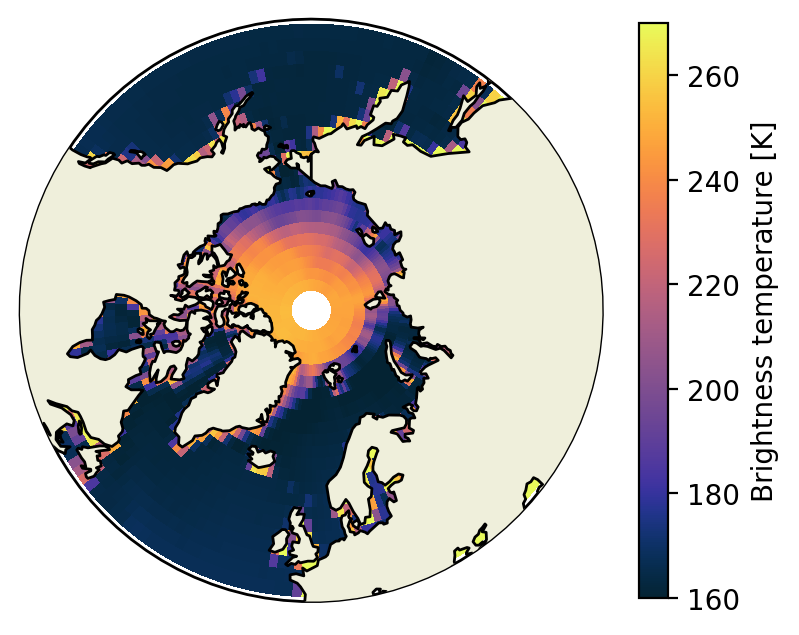

In [24]:
f = plt.figure(dpi=200)
f.set_size_inches(8.27/2,8.27/2)

ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
cs = ax.coastlines(resolution='110m', linewidth=0.5)
plt.pcolormesh(wrap_lon,lat,wrap_TBV_obs_JAS,transform=ccrs.PlateCarree(),vmax=160,vmin=270,cmap=cmocean.cm.thermal,rasterized=True)
ax.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax.set_boundary(circle, transform=ax.transAxes)
#ax.set_title()
cbar = plt.colorbar(shrink=0.75)
cbar.set_label('Brightness temperature [K]', rotation=90)
#cbar.ax.tick_params(labelsize=12)

plt.tight_layout()

#f.savefig(plot_path+'obs_mean_JAS.pdf')#,bbox_inches='tight')#rasterize=True,

Using the melt pond parametrization (absolute and difference to observations) - with colorbar

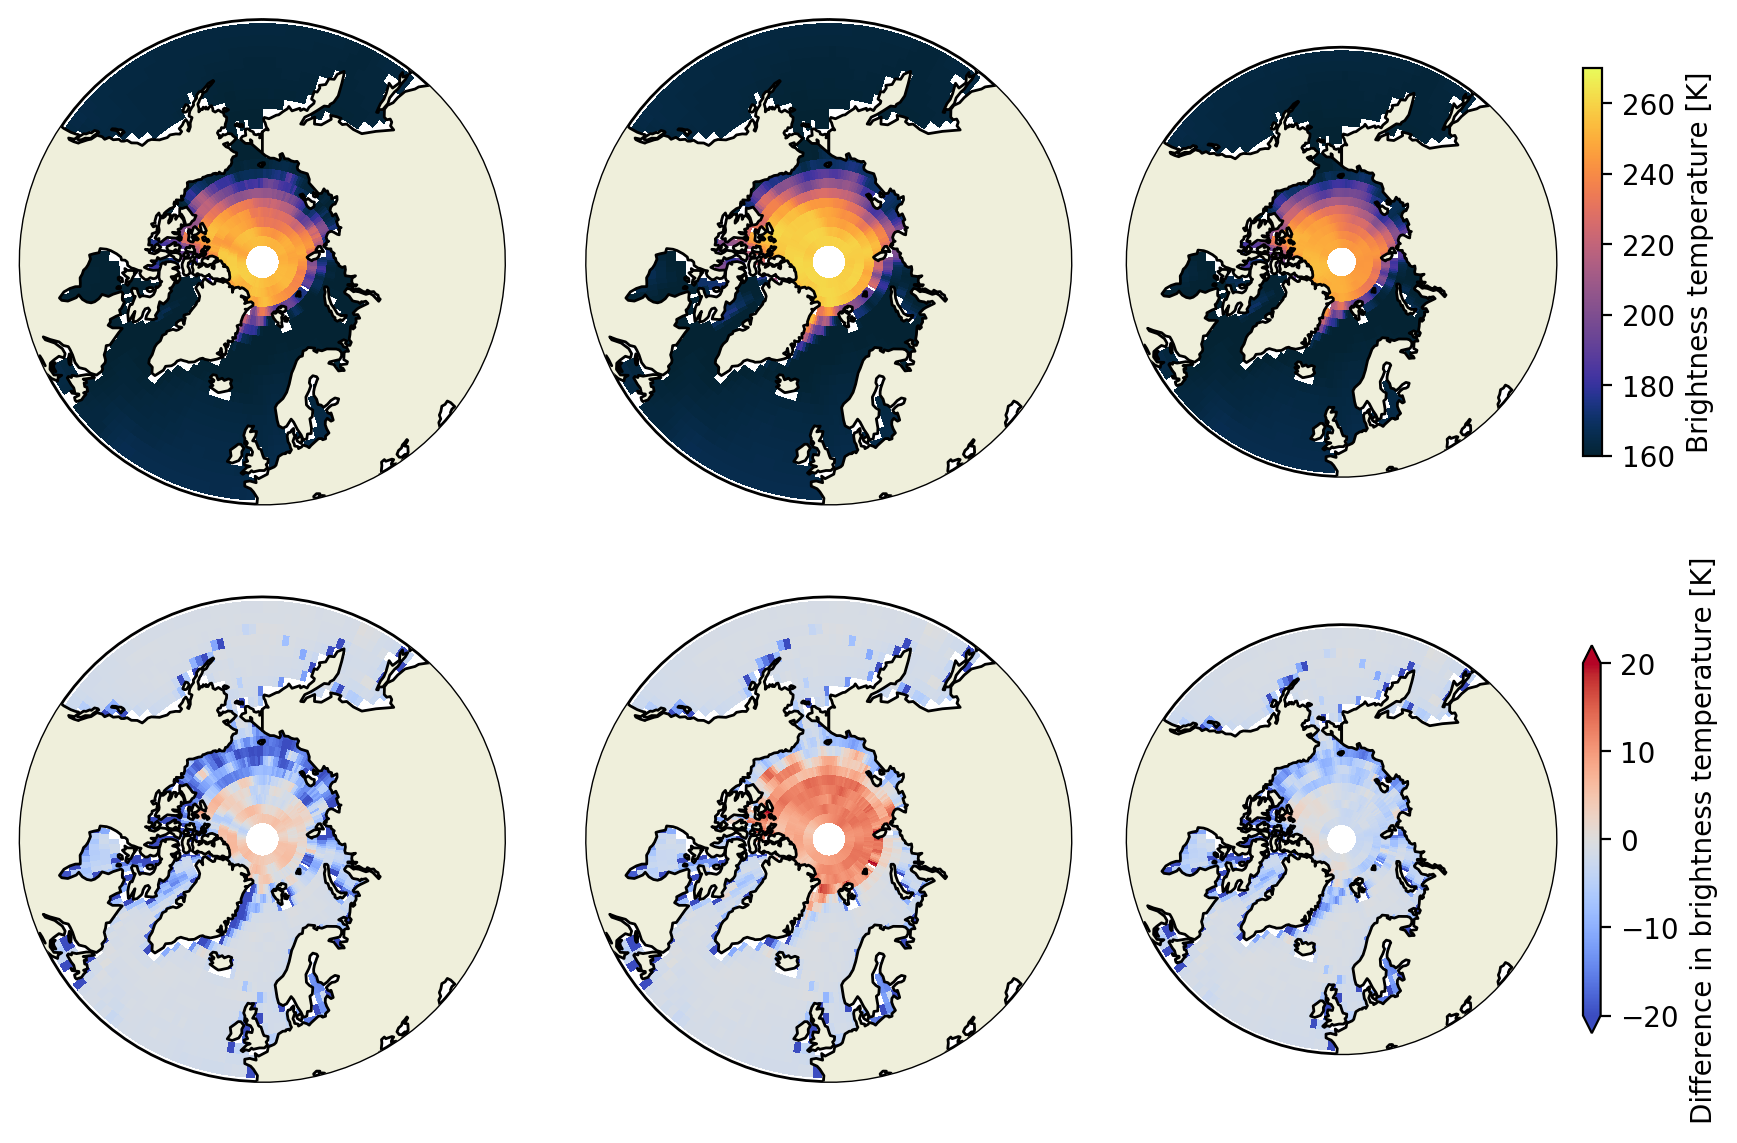

In [25]:
vmax = 270
vmin = 160
vmaxdiff = 20
vmindiff = -20

f = plt.figure(dpi=200)
f.set_size_inches(6*1.5,6)

ax1 = plt.subplot(2, 3, 1, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax1.coastlines(resolution='110m', linewidth=0.5)
abso0 = ax1.pcolormesh(wrap_lon,lat,wrap_TBV_ref_SICCI_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
ax1.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax1.set_boundary(circle, transform=ax1.transAxes)
#ax1.set_title('SatSim SICCI2')
#cbar = f.colorbar(abso0, ax=ax1, shrink=1.0,orientation='horizontal')
#cbar.set_label('TB [K]',fontsize=20)
#cbar.ax.tick_params(labelsize=18)


ax2 = plt.subplot(2, 3, 2, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax2.coastlines(resolution='110m', linewidth=0.5)
abso = ax2.pcolormesh(wrap_lon,lat,wrap_TBV_ref_BT_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
ax2.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax2.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax2.set_boundary(circle, transform=ax2.transAxes)
#ax2.set_title('SatSim Bootstrap')
#cbar = f.colorbar(abso, ax=ax2, shrink=1.0,orientation='horizontal')
#cbar.set_label('TB [K]',fontsize=20)
#cbar.ax.tick_params(labelsize=18)

ax3 = plt.subplot(2, 3, 3, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax3.coastlines(resolution='110m', linewidth=0.5)
abso = ax3.pcolormesh(wrap_lon,lat,wrap_TBV_ref_NT_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
ax3.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax3.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax3.set_boundary(circle, transform=ax3.transAxes)
#ax3.set_title('SatSim NASATeam',fontsize=14)

cbar = f.colorbar(abso, ax=ax3, shrink=0.8,orientation='vertical')
cbar.set_label('Brightness temperature [K]')
#cbar.ax.tick_params(labelsize=18)

ax4 = plt.subplot(2, 3, 4, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax4.coastlines(resolution='110m', linewidth=0.5)
abso0 = ax4.pcolormesh(wrap_lon,lat,wrap_TBV_ref_SICCI_JAS-wrap_TBV_obs_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
ax4.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax4.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax4.set_boundary(circle, transform=ax4.transAxes)
#ax4.set_title('SatSim SICCI2 - Obs')
# cbar = f.colorbar(abso0, ax=ax1, shrink=1.0,orientation='horizontal')
# cbar.set_label('TB [K]',fontsize=20)
# cbar.ax.tick_params(labelsize=18)

ax5 = plt.subplot(2, 3, 5, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax5.coastlines(resolution='110m', linewidth=0.5)
abso0 = ax5.pcolormesh(wrap_lon,lat,wrap_TBV_ref_BT_JAS-wrap_TBV_obs_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
ax5.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax5.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax5.set_boundary(circle, transform=ax5.transAxes)
#ax5.set_title('SatSim Bootstrap - Obs')
# cbar = f.colorbar(abso0, ax=ax1, shrink=1.0,orientation='horizontal')
# cbar.set_label('TB [K]',fontsize=20)
# cbar.ax.tick_params(labelsize=18)

ax6 = plt.subplot(2, 3, 6, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax6.coastlines(resolution='110m', linewidth=0.5)
diff = ax6.pcolormesh(wrap_lon,lat,wrap_TBV_ref_NT_JAS-wrap_TBV_obs_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
ax6.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax6.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax6.set_boundary(circle, transform=ax6.transAxes)
#ax6.set_title('SatSim NASATeam - Obs')

cbar = f.colorbar(diff, ax=ax6, shrink=0.8,orientation='vertical',extend='both')
cbar.set_label('Difference in brightness temperature [K]')
#cbar.ax.tick_params(labelsize=18)

#sns.despine()
plt.tight_layout()

#f.savefig(plot_path+'TBVref_diff_JAS_transposed_withlegend.pdf',rasterize=True,bbox_inches='tight',dpi=200)

Using the melt pond parametrization (absolute and difference to observations) - without colorbar

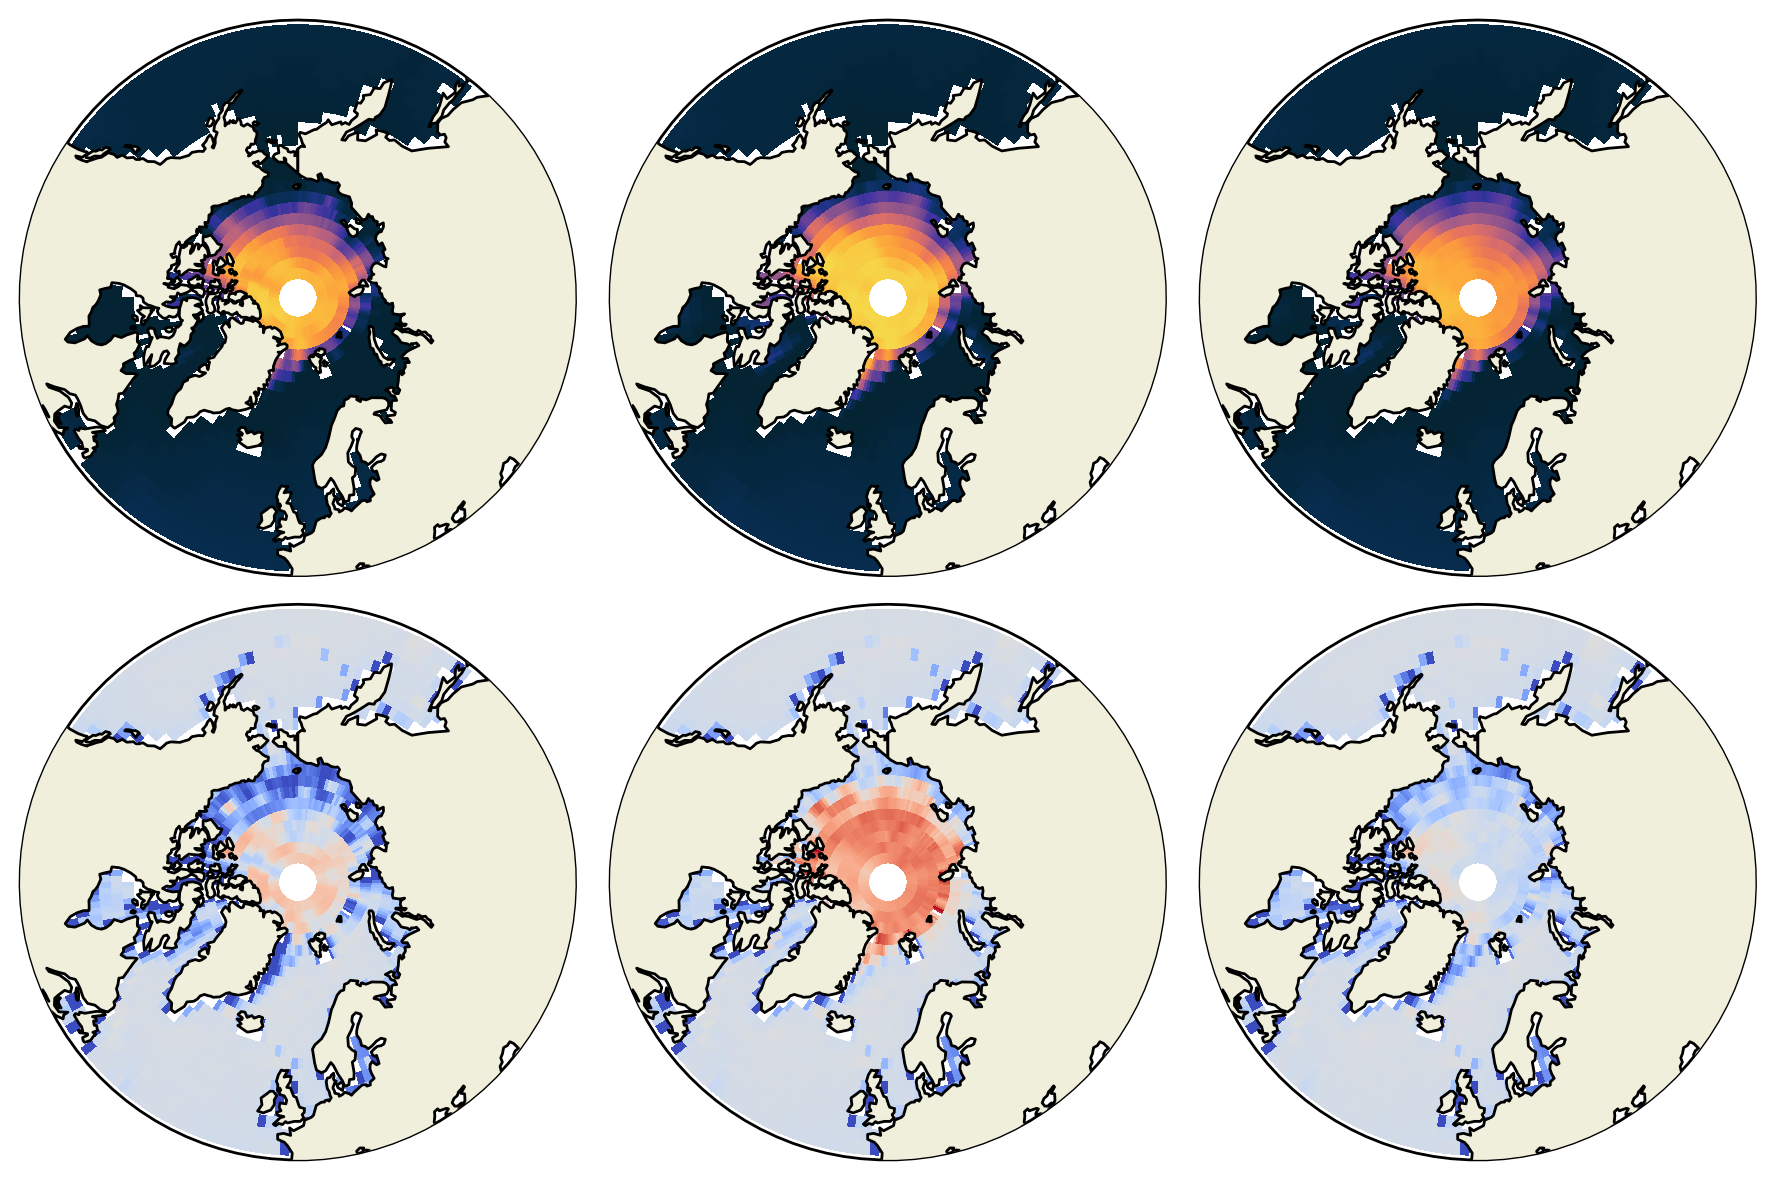

In [26]:
vmax = 270
vmin = 160
vmaxdiff = 20
vmindiff = -20

f = plt.figure(dpi=200)
f.set_size_inches(6*1.5,6)

ax1 = plt.subplot(2, 3, 1, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax1.coastlines(resolution='110m', linewidth=0.5)
abso0 = ax1.pcolormesh(wrap_lon,lat,wrap_TBV_ref_SICCI_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
ax1.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax1.set_boundary(circle, transform=ax1.transAxes)
#ax1.set_title('SatSim SICCI2')
#cbar = f.colorbar(abso0, ax=ax1, shrink=1.0,orientation='horizontal')
#cbar.set_label('TB [K]',fontsize=20)
#cbar.ax.tick_params(labelsize=18)


ax2 = plt.subplot(2, 3, 2, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax2.coastlines(resolution='110m', linewidth=0.5)
abso = ax2.pcolormesh(wrap_lon,lat,wrap_TBV_ref_BT_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
ax2.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax2.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax2.set_boundary(circle, transform=ax2.transAxes)
#ax2.set_title('SatSim Bootstrap')
#cbar = f.colorbar(abso, ax=ax2, shrink=1.0,orientation='horizontal')
#cbar.set_label('TB [K]',fontsize=20)
#cbar.ax.tick_params(labelsize=18)

ax3 = plt.subplot(2, 3, 3, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax3.coastlines(resolution='110m', linewidth=0.5)
abso = ax3.pcolormesh(wrap_lon,lat,wrap_TBV_ref_NT_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
ax3.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax3.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax3.set_boundary(circle, transform=ax3.transAxes)
#ax3.set_title('SatSim NASATeam',fontsize=14)


ax4 = plt.subplot(2, 3, 4, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax4.coastlines(resolution='110m', linewidth=0.5)
abso0 = ax4.pcolormesh(wrap_lon,lat,wrap_TBV_ref_SICCI_JAS-wrap_TBV_obs_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
ax4.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax4.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax4.set_boundary(circle, transform=ax4.transAxes)
#ax4.set_title('SatSim SICCI2 - Obs')
# cbar = f.colorbar(abso0, ax=ax1, shrink=1.0,orientation='horizontal')
# cbar.set_label('TB [K]',fontsize=20)
# cbar.ax.tick_params(labelsize=18)

ax5 = plt.subplot(2, 3, 5, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax5.coastlines(resolution='110m', linewidth=0.5)
abso0 = ax5.pcolormesh(wrap_lon,lat,wrap_TBV_ref_BT_JAS-wrap_TBV_obs_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
ax5.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax5.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax5.set_boundary(circle, transform=ax5.transAxes)
#ax5.set_title('SatSim Bootstrap - Obs')
# cbar = f.colorbar(abso0, ax=ax1, shrink=1.0,orientation='horizontal')
# cbar.set_label('TB [K]',fontsize=20)
# cbar.ax.tick_params(labelsize=18)

ax6 = plt.subplot(2, 3, 6, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax6.coastlines(resolution='110m', linewidth=0.5)
diff = ax6.pcolormesh(wrap_lon,lat,wrap_TBV_ref_NT_JAS-wrap_TBV_obs_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
ax6.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax6.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax6.set_boundary(circle, transform=ax6.transAxes)
#ax6.set_title('SatSim NASATeam - Obs')


#sns.despine()
plt.tight_layout()

#f.savefig(plot_path+'TBVref_diff_JAS_transposed_withoutlegend.pdf',rasterize=True,bbox_inches='tight',dpi=200)

Not using the melt pond parametrization (absolute and difference to observations) - with colorbar

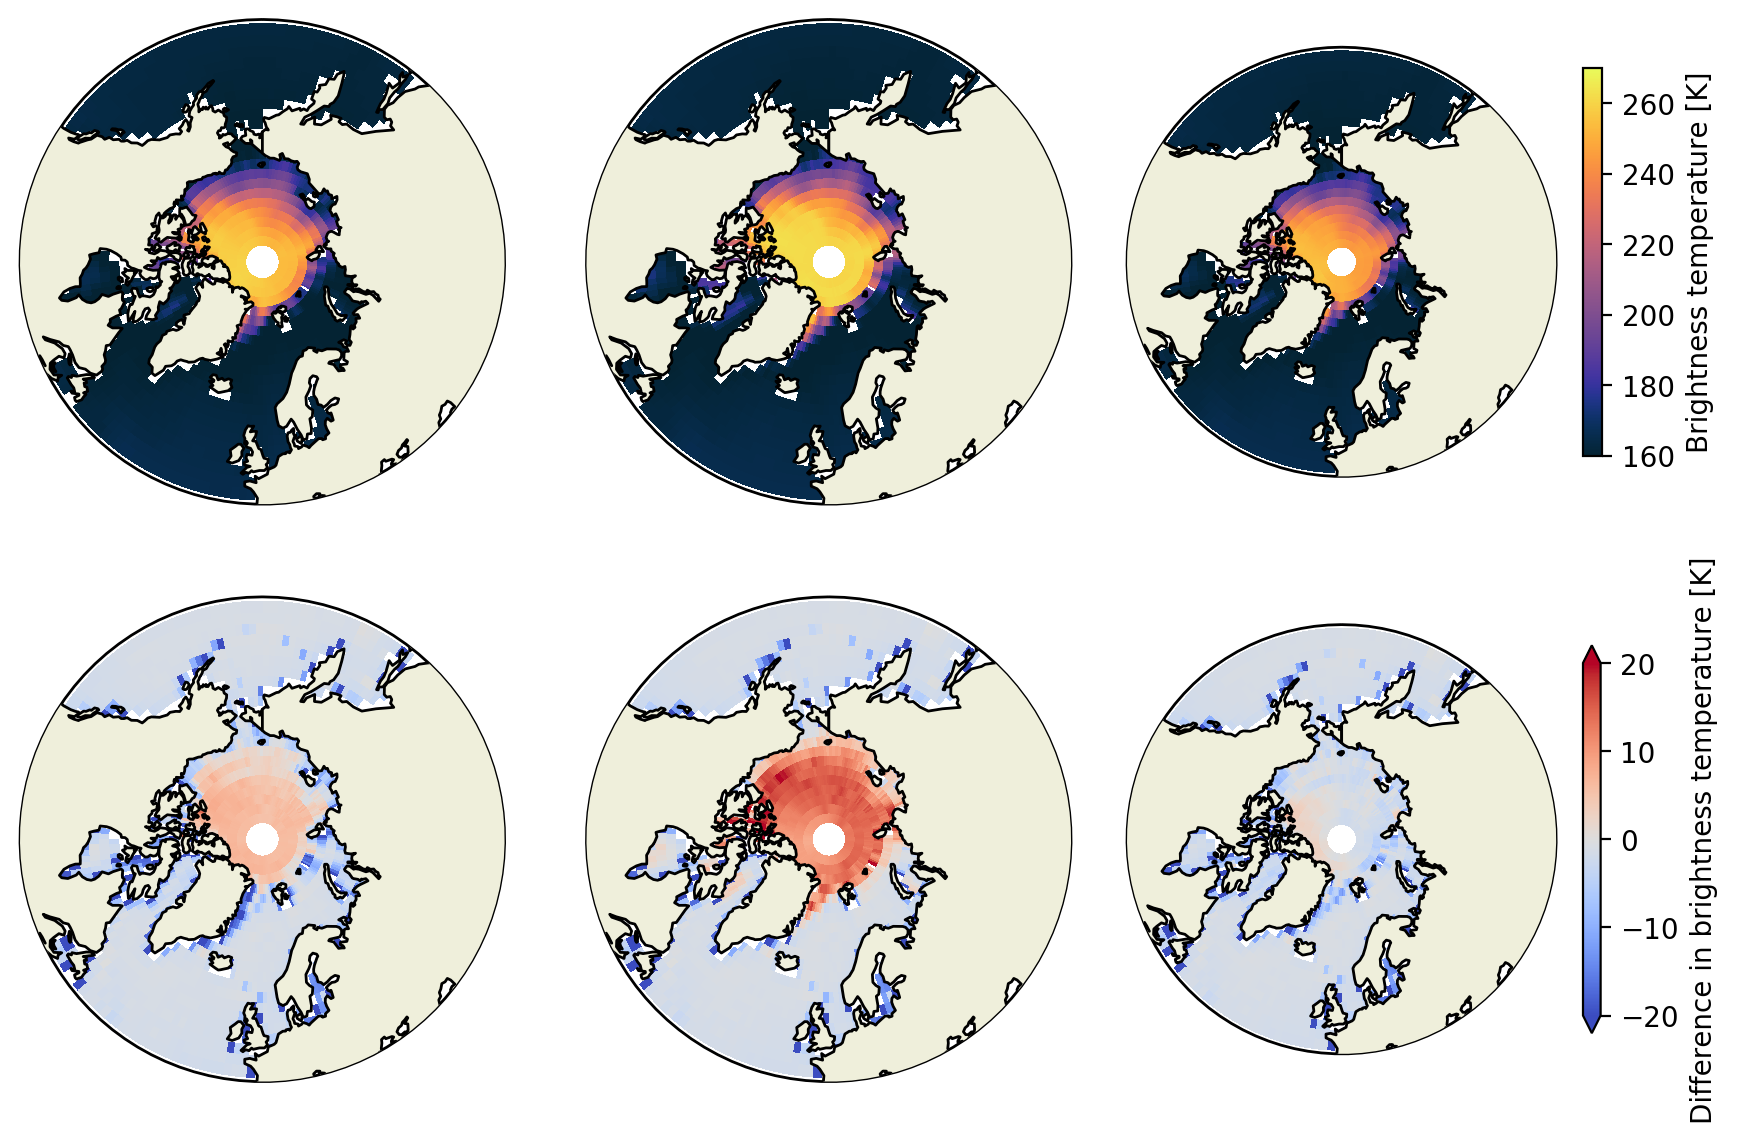

In [27]:
vmax = 270
vmin = 160
vmaxdiff = 20
vmindiff = -20

f = plt.figure(dpi=200)
f.set_size_inches(6*1.5,6)

ax1 = plt.subplot(2, 3, 1, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax1.coastlines(resolution='110m', linewidth=0.5)
abso0 = ax1.pcolormesh(wrap_lon,lat,wrap_TBV_modif_SICCI_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
ax1.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax1.set_boundary(circle, transform=ax1.transAxes)
#ax1.set_title('SatSim SICCI2')
#cbar = f.colorbar(abso0, ax=ax1, shrink=1.0,orientation='horizontal')
#cbar.set_label('TB [K]',fontsize=20)
#cbar.ax.tick_params(labelsize=18)


ax2 = plt.subplot(2, 3, 2, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax2.coastlines(resolution='110m', linewidth=0.5)
abso = ax2.pcolormesh(wrap_lon,lat,wrap_TBV_modif_BT_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
ax2.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax2.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax2.set_boundary(circle, transform=ax2.transAxes)
#ax2.set_title('SatSim Bootstrap')
#cbar = f.colorbar(abso, ax=ax2, shrink=1.0,orientation='horizontal')
#cbar.set_label('TB [K]',fontsize=20)
#cbar.ax.tick_params(labelsize=18)

ax3 = plt.subplot(2, 3, 3, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax3.coastlines(resolution='110m', linewidth=0.5)
abso = ax3.pcolormesh(wrap_lon,lat,wrap_TBV_modif_NT_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
ax3.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax3.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax3.set_boundary(circle, transform=ax3.transAxes)
#ax3.set_title('SatSim NASATeam',fontsize=14)

cbar = f.colorbar(abso, ax=ax3, shrink=0.8,orientation='vertical')
cbar.set_label('Brightness temperature [K]')
#cbar.ax.tick_params(labelsize=18)

ax4 = plt.subplot(2, 3, 4, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax4.coastlines(resolution='110m', linewidth=0.5)
abso0 = ax4.pcolormesh(wrap_lon,lat,wrap_TBV_modif_SICCI_JAS-wrap_TBV_obs_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
ax4.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax4.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax4.set_boundary(circle, transform=ax4.transAxes)
#ax4.set_title('SatSim SICCI2 - Obs')
# cbar = f.colorbar(abso0, ax=ax1, shrink=1.0,orientation='horizontal')
# cbar.set_label('TB [K]',fontsize=20)
# cbar.ax.tick_params(labelsize=18)

ax5 = plt.subplot(2, 3, 5, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax5.coastlines(resolution='110m', linewidth=0.5)
abso0 = ax5.pcolormesh(wrap_lon,lat,wrap_TBV_modif_BT_JAS-wrap_TBV_obs_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
ax5.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax5.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax5.set_boundary(circle, transform=ax5.transAxes)
#ax5.set_title('SatSim Bootstrap - Obs')
# cbar = f.colorbar(abso0, ax=ax1, shrink=1.0,orientation='horizontal')
# cbar.set_label('TB [K]',fontsize=20)
# cbar.ax.tick_params(labelsize=18)

ax6 = plt.subplot(2, 3, 6, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax6.coastlines(resolution='110m', linewidth=0.5)
diff = ax6.pcolormesh(wrap_lon,lat,wrap_TBV_modif_NT_JAS-wrap_TBV_obs_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
ax6.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax6.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax6.set_boundary(circle, transform=ax6.transAxes)
#ax6.set_title('SatSim NASATeam - Obs')

cbar = f.colorbar(diff, ax=ax6, shrink=0.8,orientation='vertical',extend='both')
cbar.set_label('Difference in brightness temperature [K]')
#cbar.ax.tick_params(labelsize=18)

#sns.despine()
plt.tight_layout()

#f.savefig(plot_path+'TBVmodif_diff_JAS_transposed_withlegend.pdf',rasterize=True,bbox_inches='tight',dpi=200)

Not using the melt pond parametrization (absolute and difference to observations) - without colorbar

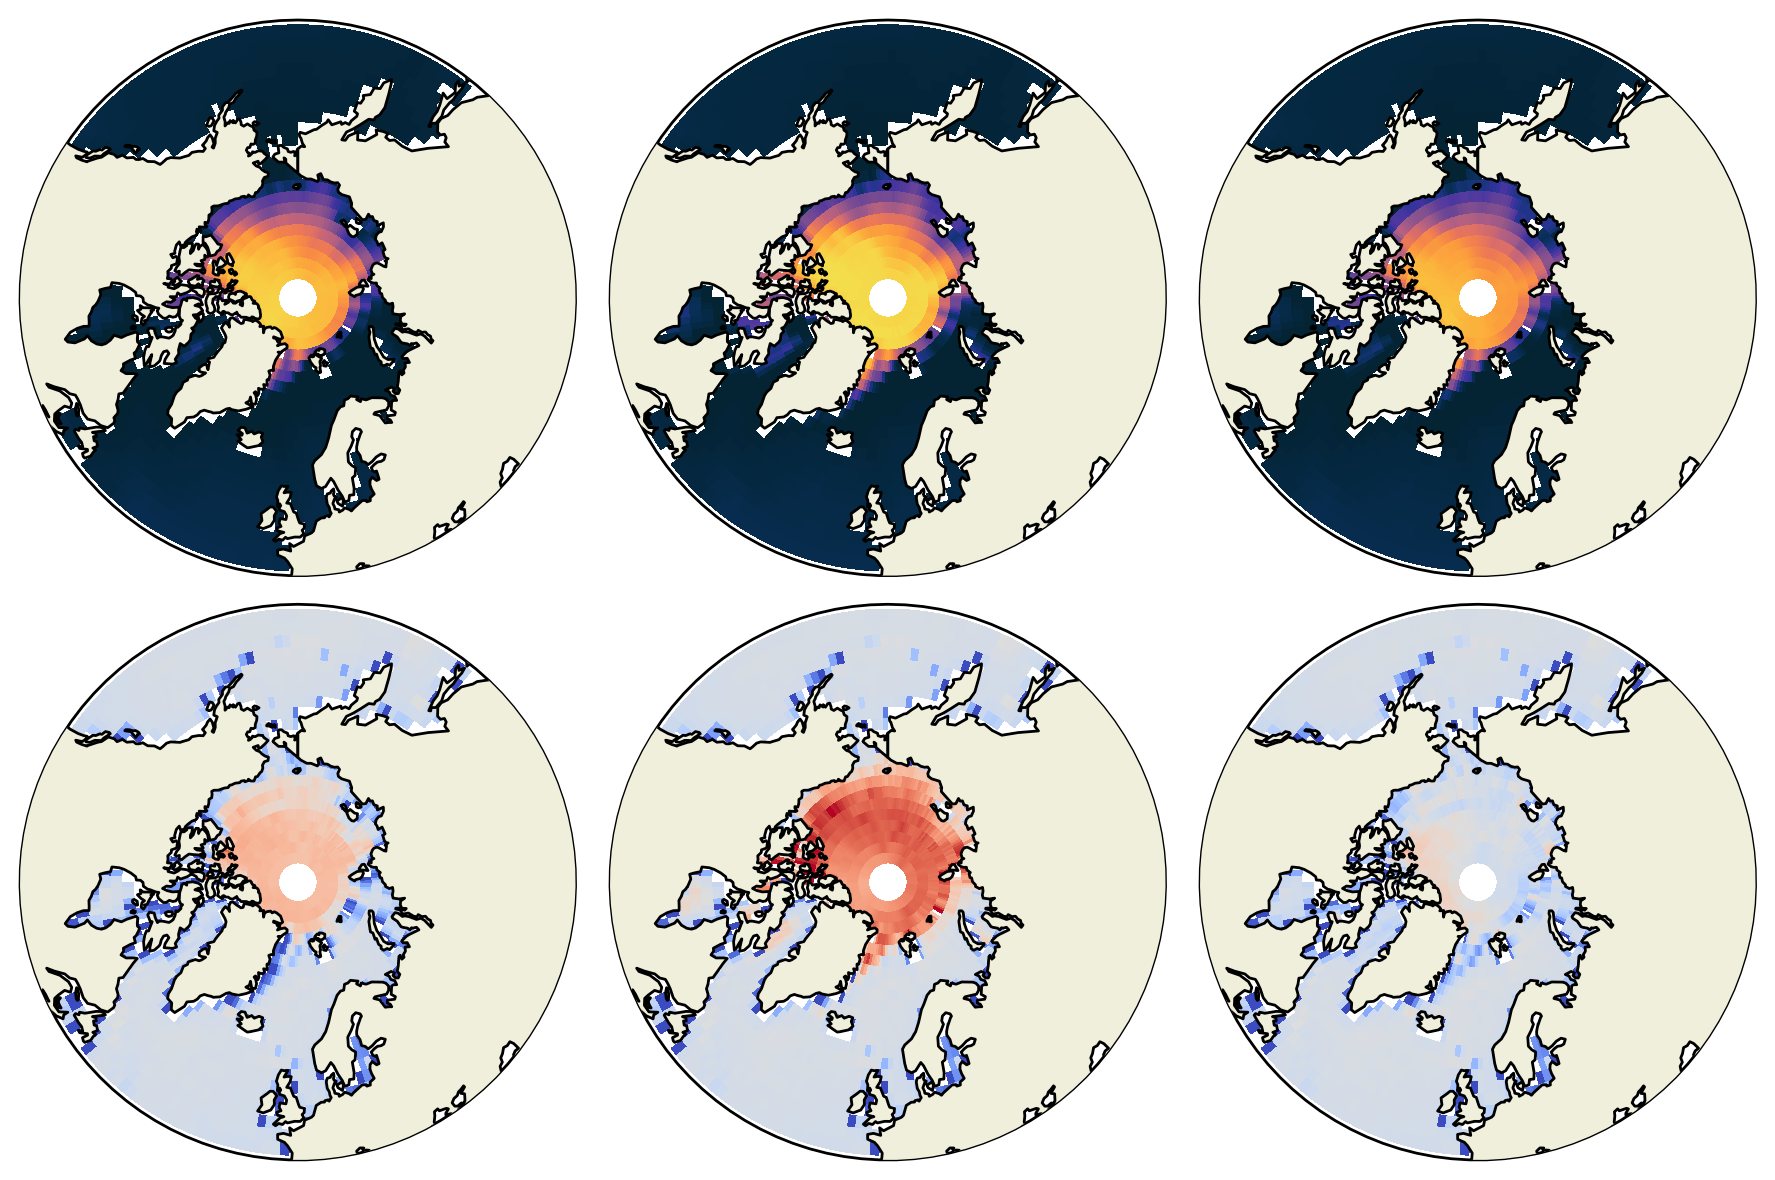

In [28]:
vmax = 270
vmin = 160
vmaxdiff = 20
vmindiff = -20

f = plt.figure(dpi=200)
f.set_size_inches(6*1.5,6)

ax1 = plt.subplot(2, 3, 1, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax1.coastlines(resolution='110m', linewidth=0.5)
abso0 = ax1.pcolormesh(wrap_lon,lat,wrap_TBV_modif_SICCI_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
ax1.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax1.set_boundary(circle, transform=ax1.transAxes)
#ax1.set_title('SatSim SICCI2')
#cbar = f.colorbar(abso0, ax=ax1, shrink=1.0,orientation='horizontal')
#cbar.set_label('TB [K]',fontsize=20)
#cbar.ax.tick_params(labelsize=18)


ax2 = plt.subplot(2, 3, 2, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax2.coastlines(resolution='110m', linewidth=0.5)
abso = ax2.pcolormesh(wrap_lon,lat,wrap_TBV_modif_BT_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
ax2.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax2.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax2.set_boundary(circle, transform=ax2.transAxes)
#ax2.set_title('SatSim Bootstrap')
#cbar = f.colorbar(abso, ax=ax2, shrink=1.0,orientation='horizontal')
#cbar.set_label('TB [K]',fontsize=20)
#cbar.ax.tick_params(labelsize=18)

ax3 = plt.subplot(2, 3, 3, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax3.coastlines(resolution='110m', linewidth=0.5)
abso = ax3.pcolormesh(wrap_lon,lat,wrap_TBV_modif_NT_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.thermal,rasterized=True)
ax3.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax3.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax3.set_boundary(circle, transform=ax3.transAxes)
#ax3.set_title('SatSim NASATeam',fontsize=14)


ax4 = plt.subplot(2, 3, 4, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax4.coastlines(resolution='110m', linewidth=0.5)
abso0 = ax4.pcolormesh(wrap_lon,lat,wrap_TBV_modif_SICCI_JAS-wrap_TBV_obs_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
ax4.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax4.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax4.set_boundary(circle, transform=ax4.transAxes)
#ax4.set_title('SatSim SICCI2 - Obs')
# cbar = f.colorbar(abso0, ax=ax1, shrink=1.0,orientation='horizontal')
# cbar.set_label('TB [K]',fontsize=20)
# cbar.ax.tick_params(labelsize=18)

ax5 = plt.subplot(2, 3, 5, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax5.coastlines(resolution='110m', linewidth=0.5)
abso0 = ax5.pcolormesh(wrap_lon,lat,wrap_TBV_modif_BT_JAS-wrap_TBV_obs_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
ax5.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax5.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax5.set_boundary(circle, transform=ax5.transAxes)
#ax5.set_title('SatSim Bootstrap - Obs')
# cbar = f.colorbar(abso0, ax=ax1, shrink=1.0,orientation='horizontal')
# cbar.set_label('TB [K]',fontsize=20)
# cbar.ax.tick_params(labelsize=18)

ax6 = plt.subplot(2, 3, 6, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax6.coastlines(resolution='110m', linewidth=0.5)
diff = ax6.pcolormesh(wrap_lon,lat,wrap_TBV_modif_NT_JAS-wrap_TBV_obs_JAS,transform=ccrs.PlateCarree(),vmax=vmaxdiff,vmin=vmindiff,cmap=mpl.cm.coolwarm,rasterized=True)
ax6.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax6.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax6.set_boundary(circle, transform=ax6.transAxes)
#ax6.set_title('SatSim NASATeam - Obs')

#sns.despine()
plt.tight_layout()

#f.savefig(outputpath_fig+'sensitivity_TBV_summer_wosnow.png')
#f.savefig(plot_path+'TBVmodif_diff_JAS_transposed_withoutlegend.pdf',rasterize=True,bbox_inches='tight',dpi=200)

Retrieving the melt pond fraction from the data

In [29]:
mpf_SICCI_JAS = (data_ref_SICCI['ameltfrac']*data_ref_SICCI['seaice']).where(data_ref_SICCI['seaice']).sel(time=is_JAS(data_ref_SICCI['time.month'])).mean('time')
mpf_BT_JAS = (data_ref_BT['ameltfrac']*data_ref_BT['seaice']).where(data_ref_BT['seaice']).sel(time=is_JAS(data_ref_BT['time.month'])).mean('time')
mpf_NT_JAS = (data_ref_NT['ameltfrac']*data_ref_NT['seaice']).where(data_ref_NT['seaice']).sel(time=is_JAS(data_ref_NT['time.month'])).mean('time')

In [30]:
wrap_mpf_SICCI_JAS, wrap_lon = add_cyclic_point(mpf_SICCI_JAS.values,coord=lon,axis=1)
wrap_mpf_BT_JAS, wrap_lon = add_cyclic_point(mpf_BT_JAS.values,coord=lon,axis=1)
wrap_mpf_NT_JAS, wrap_lon = add_cyclic_point(mpf_NT_JAS.values,coord=lon,axis=1)

Melt pond fraction in the respective MPI-ESM assimilation run - with colorbar

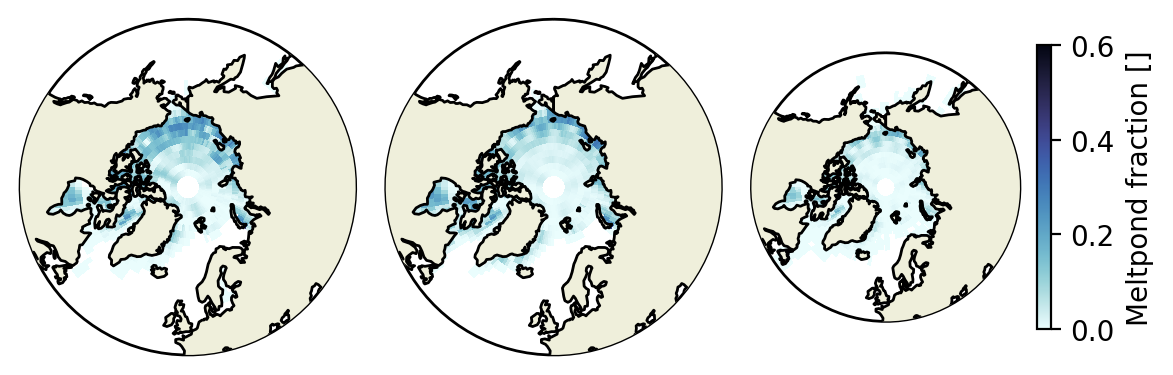

In [31]:
vmax = 0.6
vmin = 0


f = plt.figure(dpi=200)
f.set_size_inches(6,4)

ax1 = plt.subplot(2, 3, 1, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax1.coastlines(resolution='110m', linewidth=0.5)
abso0 = ax1.pcolormesh(wrap_lon,lat,wrap_mpf_SICCI_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.ice_r,rasterized=True)
ax1.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax1.set_boundary(circle, transform=ax1.transAxes)
#ax1.set_title('SatSim SICCI2')
#cbar = f.colorbar(abso0, ax=ax1, shrink=1.0,orientation='horizontal')
#cbar.set_label('TB [K]',fontsize=20)
#cbar.ax.tick_params(labelsize=18)


ax2 = plt.subplot(2, 3, 2, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax2.coastlines(resolution='110m', linewidth=0.5)
abso = ax2.pcolormesh(wrap_lon,lat,wrap_mpf_BT_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.ice_r,rasterized=True)
ax2.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax2.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax2.set_boundary(circle, transform=ax2.transAxes)
#ax2.set_title('SatSim Bootstrap')
#cbar = f.colorbar(abso, ax=ax2, shrink=1.0,orientation='horizontal')
#cbar.set_label('TB [K]',fontsize=20)
#cbar.ax.tick_params(labelsize=18)

ax3 = plt.subplot(2, 3, 3, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax3.coastlines(resolution='110m', linewidth=0.5)
abso = ax3.pcolormesh(wrap_lon,lat,wrap_mpf_NT_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.ice_r,rasterized=True)
ax3.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax3.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax3.set_boundary(circle, transform=ax3.transAxes)
#ax3.set_title('SatSim NASATeam',fontsize=14)

cbar = f.colorbar(abso, ax=ax3, shrink=0.8,orientation='vertical')
cbar.set_label('Meltpond fraction []')
#cbar.ax.tick_params(labelsize=18)

#sns.despine()
plt.tight_layout()

#f.savefig(plot_path+'meltponds_JAS_transposed_withlegend.pdf',rasterize=True,bbox_inches='tight',dpi=200)

Melt pond fraction in the respective MPI-ESM assimilation run - without colorbar

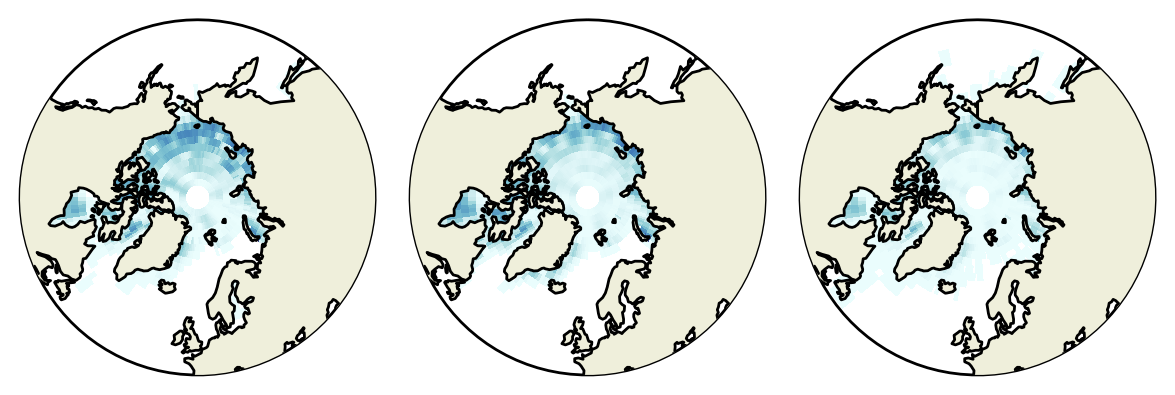

In [33]:
vmax = 0.6
vmin = 0


f = plt.figure(dpi=200)
f.set_size_inches(6,4)

ax1 = plt.subplot(2, 3, 1, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax1.coastlines(resolution='110m', linewidth=0.5)
abso0 = ax1.pcolormesh(wrap_lon,lat,wrap_mpf_SICCI_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.ice_r,rasterized=True)
ax1.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax1.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax1.set_boundary(circle, transform=ax1.transAxes)
#ax1.set_title('SatSim SICCI2')
#cbar = f.colorbar(abso0, ax=ax1, shrink=1.0,orientation='horizontal')
#cbar.set_label('TB [K]',fontsize=20)
#cbar.ax.tick_params(labelsize=18)


ax2 = plt.subplot(2, 3, 2, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax2.coastlines(resolution='110m', linewidth=0.5)
abso = ax2.pcolormesh(wrap_lon,lat,wrap_mpf_BT_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.ice_r,rasterized=True)
ax2.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax2.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax2.set_boundary(circle, transform=ax2.transAxes)
#ax2.set_title('SatSim Bootstrap')
#cbar = f.colorbar(abso, ax=ax2, shrink=1.0,orientation='horizontal')
#cbar.set_label('TB [K]',fontsize=20)
#cbar.ax.tick_params(labelsize=18)

ax3 = plt.subplot(2, 3, 3, projection=ccrs.NorthPolarStereo(central_longitude=0))
ax3.coastlines(resolution='110m', linewidth=0.5)
abso = ax3.pcolormesh(wrap_lon,lat,wrap_mpf_NT_JAS,transform=ccrs.PlateCarree(),vmax=vmax,vmin=vmin,cmap=cmocean.cm.ice_r,rasterized=True)
ax3.set_extent([-180, 180, lat_lim, 90], crs=ccrs.PlateCarree())
ax3.add_feature(cartopy.feature.LAND, zorder=100, edgecolor='black')
ax3.set_boundary(circle, transform=ax3.transAxes)
#ax3.set_title('SatSim NASATeam',fontsize=14)


#sns.despine()
plt.tight_layout()

#f.savefig(plot_path+'meltponds_JAS_transposed_withoutlegend.pdf',rasterize=True,bbox_inches='tight',dpi=200)